# Библиотека Pytorch

## Установка

Ссылки для установки под ваше оборудование можно найти [тут](https://pytorch.org/get-started/locally/).

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!python -m pip list | grep torch

torch                         1.12.1+cu113
torchaudio                    0.12.1+cu113
torchsummary                  1.5.1
torchtext                     0.13.1
torchvision                   0.13.1+cu113


## Обзор возможностей и особенностей

## Тензоры

In [ ]:
a = torch.Tensor([1,2,3])
a

tensor([1., 2., 3.])

In [ ]:
b = torch.tensor([1,2,3])
b

tensor([1, 2, 3])

Типы данных

In [ ]:
a.dtype, b.dtype

(torch.float32, torch.int64)

Перевод данных в другой тип

In [ ]:
c = b.float()

print(c, c.dtype)

print(c.int(), c.int().dtype)
print(c.long(), c.long().dtype)
print(c.double(), c.double().dtype)

tensor([1., 2., 3.]) torch.float32
tensor([1, 2, 3], dtype=torch.int32) torch.int32
tensor([1, 2, 3]) torch.int64
tensor([1., 2., 3.], dtype=torch.float64) torch.float64


In [ ]:
x = torch.rand(2, 3)
print(x) 
print(x.device)
print(x.dtype)

tensor([[0.3347, 0.3382, 0.5607],
        [0.5498, 0.4611, 0.3889]])
cpu
torch.float32


## Воспроизводимость результатов

In [ ]:
# для воспроизводимости результатов
# не изменяйте и не удаляйте этот код
from numpy.random import seed
import random

random.seed(0)
seed(0)
torch.manual_seed(0)

In [ ]:
!pip install pytorch-lightning -qqq

     |████████████████████████████████| 798 kB 30.4 MB/s 
     |████████████████████████████████| 512 kB 68.1 MB/s 
     |████████████████████████████████| 125 kB 68.0 MB/s 
     |████████████████████████████████| 87 kB 6.2 MB/s 


In [ ]:
import pytorch_lightning as pl

In [ ]:
from pytorch_lightning import seed_everything

Function that sets seed for pseudo-random number generators in: pytorch, numpy, python.random

In [ ]:
seed_everything(0, workers=True)                

INFO:lightning_lite.utilities.seed:Global seed set to 0


0

Подробнее можно прочитать [тут](https://pytorch.org/docs/stable/notes/randomness.html).

## CUDA

In [ ]:
# проверка доступности видеокарты, выбор устройства CPU или GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Данные нужно вручную переносить в видеопамять -- метод cuda. Перенос в оперативную память -- cpu. Альтернатива -- использование метода `.to(device)`. По умолчанию данные на cpu.

In [ ]:
d = c.to(device)

In [ ]:
import torch

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)

In [ ]:
!nvidia-smi

Thu Dec  1 08:03:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    32W /  70W |    612MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def allocate_empty_tensor(dim_size):
  a=torch.zeros(4096,dim_size,dtype=torch.float32,device='cuda')

In [ ]:
allocate_empty_tensor(2048)

In [ ]:
torch.cuda.memory_allocated()

512

In [ ]:
torch.cuda.memory_reserved()

9833545728

In [ ]:
!nvidia-smi

Wed Nov 30 17:16:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    28W /  70W |  10194MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
allocate_empty_tensor(10072)

In [ ]:
torch.cuda.memory_reserved()

218103808

In [ ]:
!nvidia-smi

Wed Nov 30 17:17:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    28W /  70W |   1024MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.memory_reserved()
torch.cuda.empty_cache()
torch.cuda.memory_reserved()

2097152

In [ ]:
!nvidia-smi

Wed Nov 30 15:49:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    25W /  70W |    612MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
allocate_empty_tensor(600000)
torch.cuda.memory_reserved()

9833545728

## Точность

In [ ]:
torch.manual_seed(1337)
x = torch.randn(5000, 5000)

def matrix_power(x):
  y = x @ x @ x @ x @ x @ x
  return (y).sum().item()

print(matrix_power(x))
print(matrix_power(x.cuda()))

27654770130944.0
27654807879680.0


In [ ]:
print(matrix_power(x.numpy()))
np.linalg.matrix_power(x.numpy(),6).sum()

27654791102464.0


NameError: ignored

Takeaway: numerical precision of floating point computations can vary between libraries, environments and devices, and from the user side, it is often hard to resolve this issue altogether. Usually, this happens due to a different summation order in code or due to inherent nondeterminism of hardware.

However, note that the relative error is small enough, which makes such blatant discrepancies less of a problem in regular deep learning code.


## Нейроны и линейные слои

![alt text](https://drive.google.com/uc?export=view&id=1k96ch-5lAGYrfBk4xgoty93xy-GP2bhr)


![alt text](https://drive.google.com/uc?export=view&id=1ORawq1pZJ7a2z7vUD2PPyLELkOHoAB51)

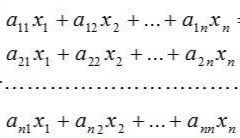

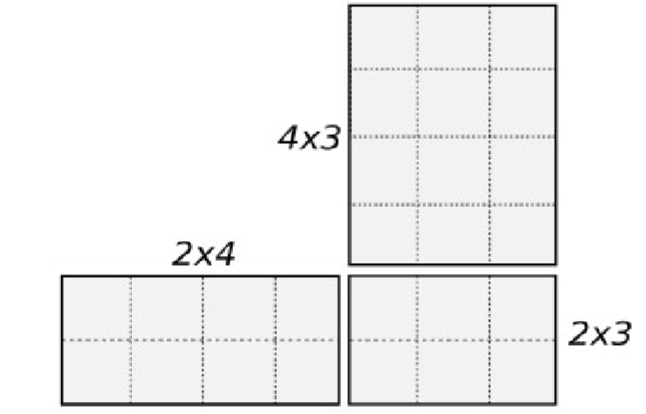

In [ ]:
batch_size = 2 # Количество покупателей
w = 4          # Количество существующих товаров
m = 3          # Количество существующих магазинов

# Матрица покупателей
X = torch.rand(batch_size, w)

# Матрица цен в магазине
W = torch.rand(m,w)

# Цена за топливо
b = torch.rand(m)

print(X.shape, W.shape, b.shape)

print(X)

answer = X @ W.T + b
answer.shape

torch.Size([2, 4]) torch.Size([3, 4]) torch.Size([3])
tensor([[0.5997, 0.7686, 0.8438, 0.6866],
        [0.9745, 0.5593, 0.4227, 0.4468]])


torch.Size([2, 3])

In [ ]:
linear = torch.nn.Linear(4, 3)
out = linear(X)
out.shape

torch.Size([2, 3])

In [ ]:
linear.weight.data.shape

torch.Size([3, 4])

### Встроенные слои

In [ ]:
from torch import nn # модуль с базовыми слоями
import torch.nn.functional as F # модуль с базовыми функциями

In [ ]:
dir(nn)[:10]

Два способа создания нейросети:
  1. на основе готового класса `nn.Sequential` объединяющего отдельные слои
    - данные передаются по сети в том порядке, в каком объявлены слои
    - функции активации задаются как отдельные слои
  2. свой класс для нейросети, на основе `nn.Module`
    - порядок передачи данных можно менять во время обучения, переопределив forward - динамический граф вычислений

Первый способ стоит использовать только как контейнер для ряда слоев. Неросеть нужно наследовать от `nn.Module`.


In [ ]:
net_seq = nn.Sequential(
    nn.Linear(in_features=3, out_features=5),
    nn.Sigmoid(),
    nn.Linear(in_features=5, out_features=2),                                                            
)
net_seq.to(device)
net_seq

In [ ]:
net_seq(x)

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=5)
        self.fc2 = nn.Linear(in_features=5, out_features=2)

    def forward(self, x):
        x = self.fc1(x)
        return F.sigmoid(self.fc2(x))

In [ ]:
net_model = Model()
net_model.to(device)
net_model

### **Задача 1**. Посчитайте количество обучаемых параметров в сети net_seq и net_model.

In [ ]:
# Ваш ответ

# Домашнее задание

Дедлайн домашнего задания - текущее воскресенье 23:59. 

**Домашнее задание 0:** Создайте репозиторий на Github. Вся дальнейшая домашка загружается туда. Чуть позже в телеграм чате будет выложена форма для сдачи.

**Домашнее задание 1:** реализуйте XOR с помощью 3 нейронов. Запишите ответ в виде выражения, состоящего из объектов neuron() – моделей нейрона с пороговой функцией активации, внутри скобок может быть что угодно. Входы верхнего уровня называются x1 и x2. Пример фрагмента записи: neuron(1*x1 + 5*x2 - 0.1) + neuron(x1) (ответ будет выглядеть чуть сложнее, но других символов вроде && не потребуется).


Модель: >>

(neuron1(-1*x1 - 1*x2 + 1.5) + neuron2(x1+x2) ) -> neuron(neuron1 + neuron2 - 1)


In [ ]:
import torch
from torch import nn # модуль с базовыми слоями
import torch.nn.functional as F # модуль с базовыми функциями

In [ ]:
#neuron1 = Neuron()

class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(2,1)


  def forward(self, x):
    x1 = self.fc1(x)
    return torch.heaviside(x1, torch.tensor([0.]))
neuron1 = Neuron()
neuron1.fc1.weight.data = torch.tensor([[1.0, 1.0]])
neuron1.fc1.bias.data = torch.tensor([0.0])


ne2 = Neuron()
ne2.fc1.weight.data = torch.tensor([[-1.0,-1.0]]);
ne2.fc1.bias.data = torch.tensor([1.5]); 
ne3 = Neuron()

ne3.fc1.weight.data = torch.tensor([[1.0,1.0]])
ne3.fc1.bias.data = torch.tensor([-1.0]); 


In [ ]:
x2 = torch.tensor([1.0,0.0])
xn = neuron1(x2) @ torch.tensor([[0.,1.]])
xn2 = ne2(x2) @ torch.tensor([[1.,0.]])

ne3(torch.add(xn,xn2)) #итоговый ответ

tensor([1.], grad_fn=<NotImplemented>)

**Домашнее задание 2:** нарисуйте backward граф для выражения `a*b+c*d`. [Теория и пример оформления](https://www.youtube.com/watch?v=MswxJw-8PvE). Сравните полученные теоретические значения с аттрибутами grad у исходных тензоров.

In [ ]:
a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([4.0], requires_grad=True)
c = torch.tensor([1.0], requires_grad=True)
d = torch.tensor([5.0], requires_grad=False)

In [ ]:
print(a.grad)

None


In [ ]:
loss = a*b + c*d
loss.backward()

In [ ]:
print(a.grad)

tensor([4.])


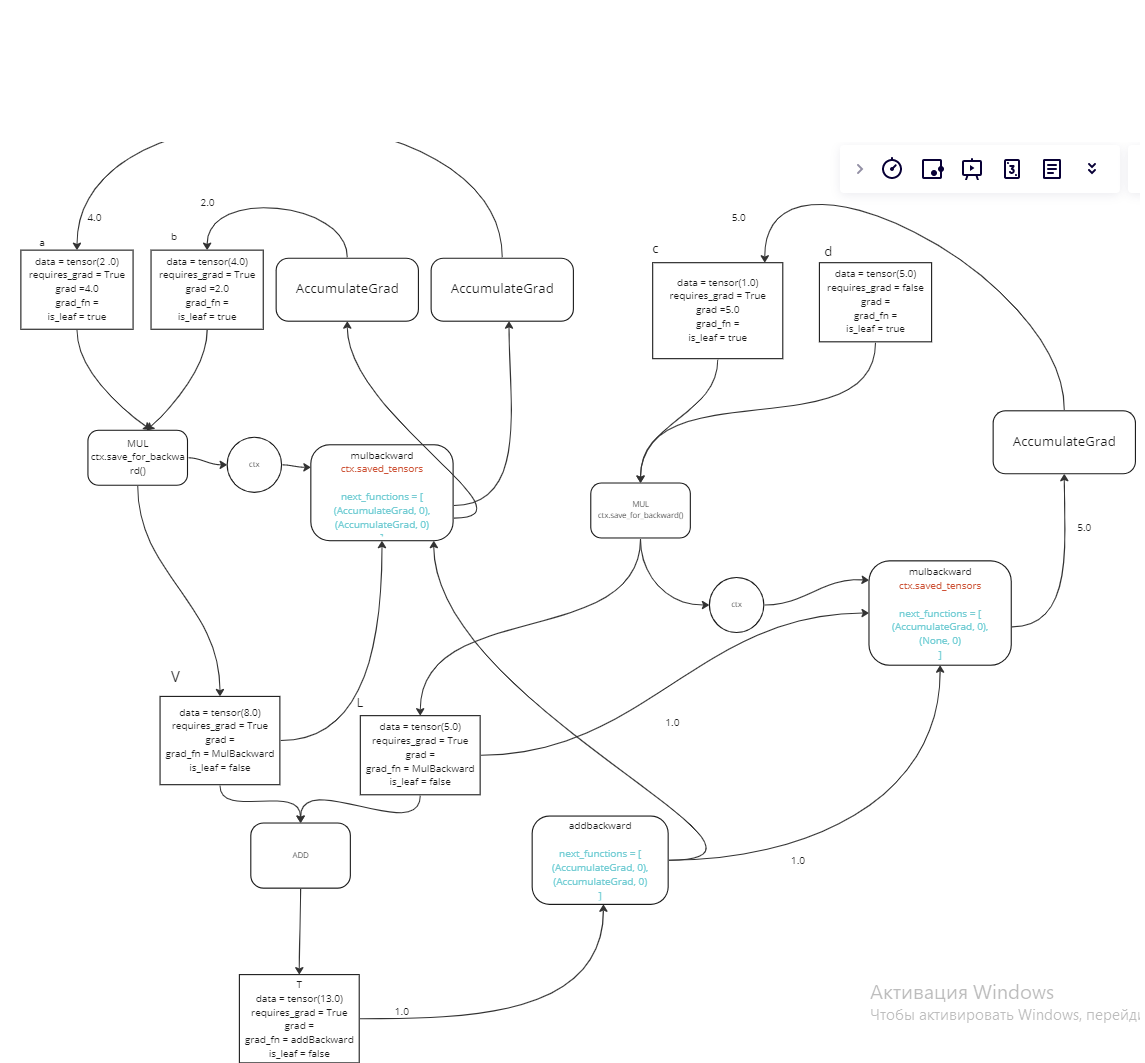

**Домашнее задание 3:** Поэксперементируйте с размером тензоров, которые влезут на видеоркарту в Colab. Найдите максимальный размер тензора для типа данных float32, float64, float16, int32, int64. На сколько они отличаются.

In [ ]:
import torch
def allocate_empty_tensor(dim_size):
  a=torch.zeros(4096,dim_size,dtype=torch.int64,device='cuda')

In [ ]:
allocate_empty_tensor(475386)

In [ ]:
torch.cuda.memory_reserved()

1971322880

Для float32: (4096,914386)
<br>
float16: (4096,1758909)
<br>
float64: (4096,457918)
<br>
int64: (4096, 475386)
<br>
int32: (4096, 934919)
<br>
большая разница в силу области определения каждого типа

In [ ]:
!nvidia-smi

Thu Dec  1 16:27:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    26W /  70W |  15106MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.memory_reserved()
torch.cuda.empty_cache()
torch.cuda.memory_reserved()

15200157696

**Домашнее задание 4:** Напишите хороший пример неэффективного кода для занятия памяти видеокарты, который вызовет ошибку out of memory

In [ ]:
list1 = [torch.rand(50000,50000)]


In [ ]:
list1 = [torch.rand(500,500,device="cuda")]
i=0
while i<=19000:
  i+=1
  nten = torch.rand(500,500, device="cuda")
  list1.append(torch.add(nten,list1[-1]))
# вычисление суммы каких либо тензоров

RuntimeError: ignored

**Домашнее задание 5:** Используя один линейный слой `nn.Linear` и один входной тензор `x` подберите подберите размерности так, чтобы занимать всю видеопамять.
Попробуйте применить линейный слой к тензору `x`. Что произойдет? Кратко опишите ваши эксперименты. Что вы поняли?

In [ ]:
j = 660040
x = torch.nn.Linear(j,j, device="cuda")

test = torch.rand(5000, j,device="cuda")

x(test)


#при больших размерах не удасться либо зарезервировать на этапе создания нейрона или в процессе применения x к нейрону

RuntimeError: ignored

Усложнение модели, то-есть увеличение количества признаков, либо опытов может осложнить обучение, поэтому следует либо оптимизировать и избавляться от маловлияющих признаков, либо увеличивать память видеокарты



In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

0